In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import seaborn as sns

# removing warnings
import sys
import warnings
warnings.simplefilter("ignore")

# depicting tree predictions
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

In [2]:
 avocado_info = pd.read_csv('avocado.csv')

In [3]:
avocado_info.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#to see whish states this data covers 
avocado_info['region'].unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [5]:
#this data time range is from 2015 to 2018.
avocado_org = avocado_info.copy()
avocado_org['year'] = avocado_org['Date'].astype('datetime64[Y]')
avocado_org['year'].unique()

array(['2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [35]:
# Missing data.
avocado_org.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [36]:
#checking dublicates
avocado_org.duplicated().sum()

0

In [6]:
#selecting a subset of avocado_info using a column condition
albany_avo = avocado_info[avocado_info['region']== 'Albany'].copy()

In [7]:
#change the index from unnamed ro date
albany_avo.set_index('Date', inplace =  True)


In [8]:
#drop the unnamed colunm 
albany_avo.drop(['Unnamed: 0'], axis = 1 , inplace = True)

<AxesSubplot:xlabel='Date'>

<Figure size 1440x576 with 0 Axes>

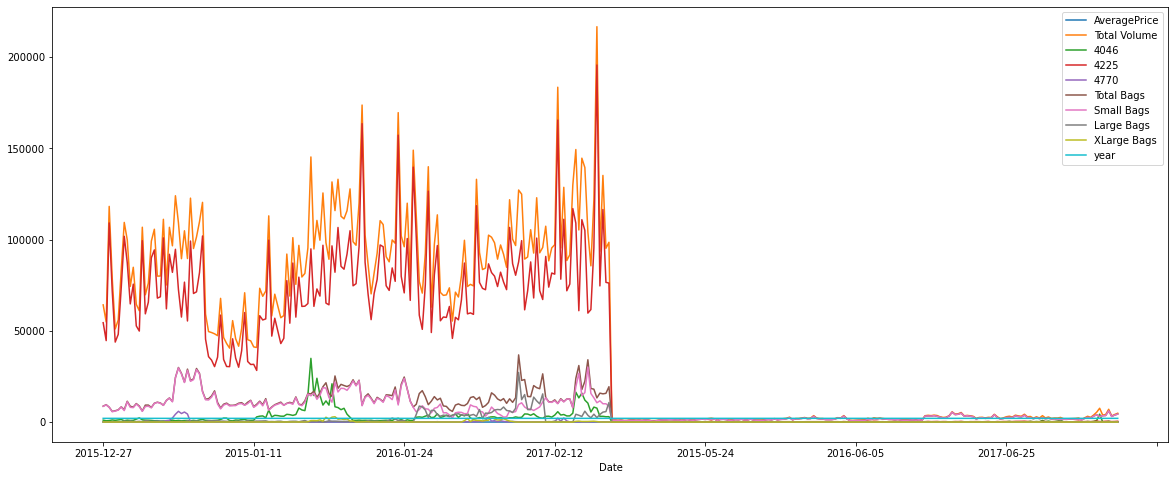

In [9]:
# we need to devide the dates to time slots 
plt.figure(figsize = (20,8))
albany_avo.plot(figsize = (20,8), legend = True)

<AxesSubplot:xlabel='Date'>

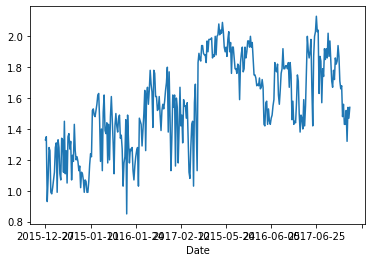

In [10]:
albany_avo['AveragePrice'].plot()


albany_avo['AveragePrice'].plot()

<AxesSubplot:xlabel='Date'>

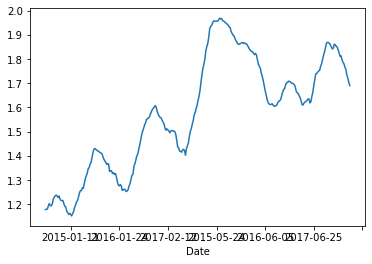

In [11]:
# getting rolling mean to smoothen the data
albany_avo['AveragePrice'].rolling(25).mean().plot()

In [12]:
#sorting the index
albany_avo.sort_index(inplace=True)


<AxesSubplot:xlabel='Date'>

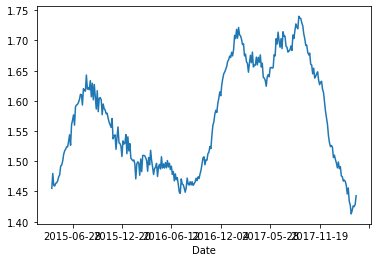

In [13]:
albany_avo['AveragePrice'].rolling(30).mean().plot()

In [14]:
#storing the rolling average in anew column 
albany_avo['rolling_mean_25'] = albany_avo['AveragePrice'].rolling(25).mean()

In [15]:
avocado_org = avocado_info[avocado_info['type'] == 'organic']
avocado_org['Date'] = pd.to_datetime(avocado_org['Date'])

In [16]:
avocado_org.sort_values(by = ['Date'], ascending = True, inplace = True)

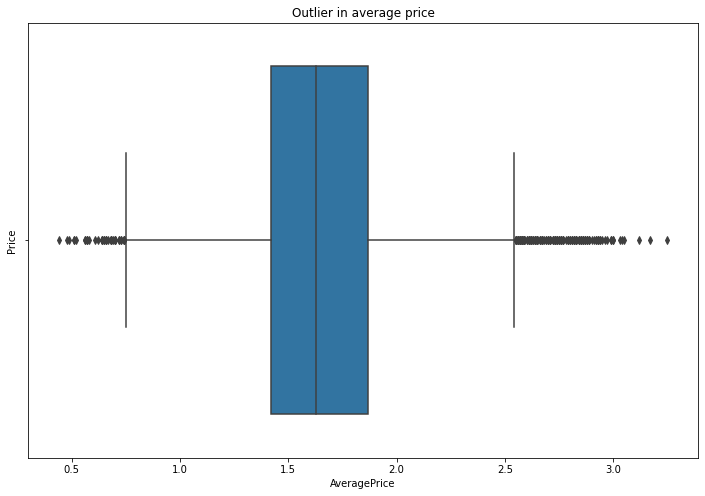

In [18]:
#checking outlir average price
ax = plt.figure(figsize = (12,8))

sns.boxplot(x = 'AveragePrice' , data = avocado_org)

plt.ylabel('Price')
plt.title('Outlier in average price')
plt.show()

In [20]:
#sebertaing every nation as a data frame 
#this time cosidering only on etype no dublicste dates
graph_avo = pd.DataFrame()


for region in avocado_org['region'].unique():
    region_avo = avocado_org.copy()[avocado_org['region'] == region]
    region_avo.set_index('Date', inplace = True)
    region_avo.sort_index(inplace = True) #the dates get sorted in porper order
    region_avo[f'{region}_price'] = region_avo['AveragePrice'].rolling(25).mean()
    
    
    if graph_avo.empty:
        graph_avo = region_avo[[f'{region}_price']]
    else:
        graph_avo = graph_avo.join(region_avo[f'{region}_price'])
        
graph_avo

,California_price,LasVegas_price,PhoenixTucson_price,BuffaloRochester_price,Spokane_price,LosAngeles_price,Philadelphia_price,Boston_price,StLouis_price,Louisville_price,...,Houston_price,Chicago_price,Plains_price,Indianapolis_price,SouthCentral_price,Columbus_price,Albany_price,Detroit_price,NewOrleansMobile_price,NewYork_price
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092


In [21]:
#plotting the graph without matplotlib 

<AxesSubplot:xlabel='Date'>

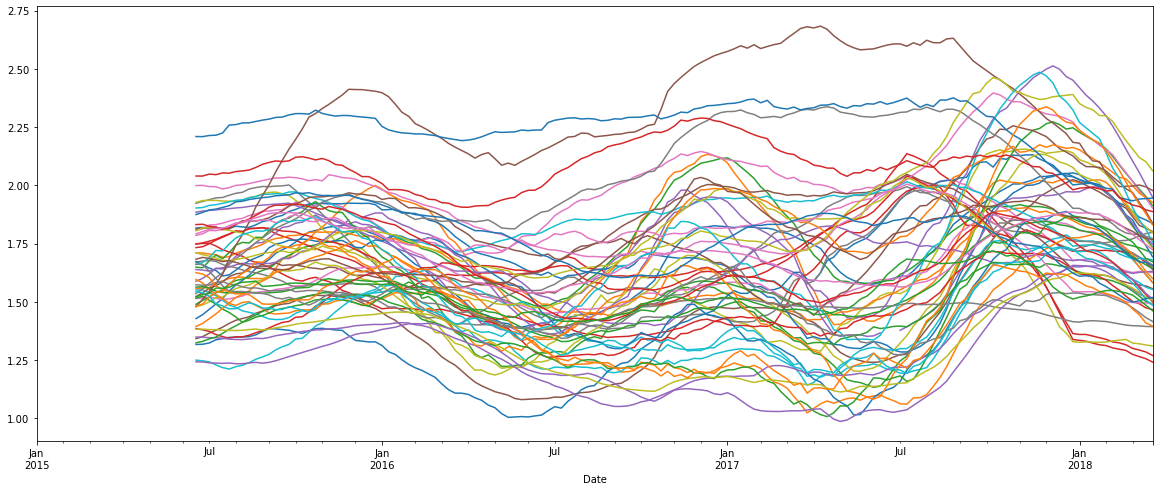

In [22]:
graph_avo.plot(figsize = (20,8), legend = False)

In [23]:
#to explore the data more

def data_explore(avocado_info):
    #instail exploration
    display(avocado_info.head())
    display(avocado_info.info())
    display(avocado_info.describe(include = 'all'))
    display(avocado_info.columns)
    
    #cheching for missing data
    data_missing = pd.isnull(avocado_info).sum().sum()
    
    if data_missing > 0 :
        print(f'\n missing values are {data_missing} ')
        
    else:
        print(f'\nThere are no missing values in dataframe\n')
        
    #UNIQUE VALUE
    for col in avocado_info.columns:
        if avocado_info[col].dtype == 'object' or avocado_info[col].dtype == 'str':
            print(avocado_info[col].unique())

            
data_explore(avocado_info)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


None

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


There are no missing values in dataframe

['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-

In [24]:
#Data Preprocessing

In [25]:
#renaming columns and dropping unnecesary ones
avocado_info.columns = avocado_info.columns.str.lower()
#dropping the unnamed: 0 column
avocado_info.drop(avocado_info.columns[0], axis = 1, inplace = True)


In [26]:
for col in avocado_info.columns:
    #convert date into date type
    if col == 'date':
        avocado_info[col] = pd.to_datetime(avocado_info[col])
        
    elif avocado_info[col].dtype == 'object': #changing to category
        
        avocado_info[col] = avocado_info[col].astype('category')

In [27]:
numeric_cols = [col for col in avocado_info.columns 
                if avocado_info[col].dtype in ['int64', 'float64']]

numeric_cols.remove('year')

cat_cols = ['region', 'type']

date_cols = ['date', 'year']
        

In [28]:
avocado_info

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


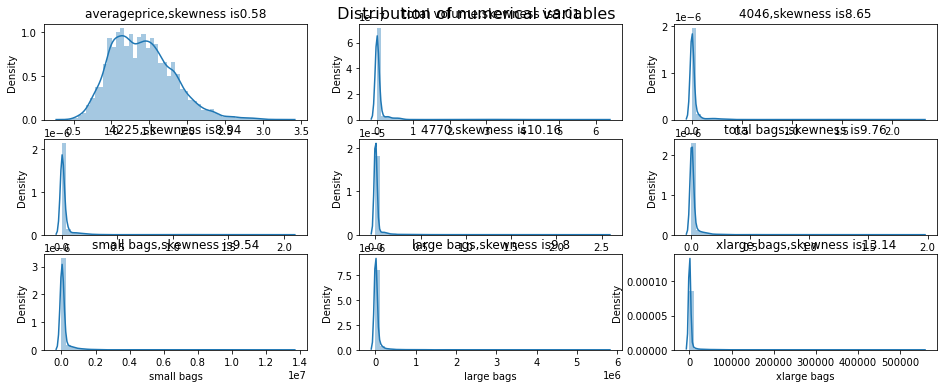

In [29]:
def dist_custom(data, column_list, rows, cols, suptitle):
    # to make 6 different graphs
    fig, axs = plt.subplots(rows, cols, figsize = (16,6))
    #defining each graph size
    fig.suptitle(suptitle, y = 0.92, size=16)
    
    axs = axs.flatten()
    
    for i, col in enumerate(column_list):
        sns.distplot(data[col],ax = axs[i])
        
        axs[i].set_title(col + ',skewness is' + str(round(data[col].skew(axis = 0, skipna = True), 2)))
dist_custom(avocado_info, numeric_cols, 3, 3, ' Distribution of numerical variables \n')

<AxesSubplot:>

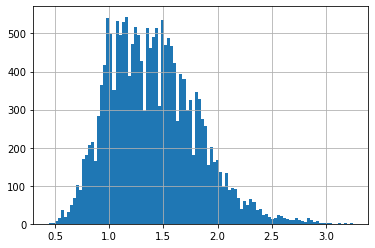

In [30]:
avocado_info['averageprice'].hist(bins=100)

In [31]:
q1 = avocado_info[numeric_cols].quantile(0.25)

In [32]:
q1

averageprice        1.10
total volume    10838.58
4046              854.07
4225             3008.78
4770                0.00
total bags       5088.64
small bags       2849.42
large bags        127.47
xlarge bags         0.00
Name: 0.25, dtype: float64

In [33]:
regions = avocado_info.groupby(['region'])['total volume'].sum().sort_values(ascending = False).reset_index()
top_reg = regions[0:9]

<AxesSubplot:xlabel='region'>

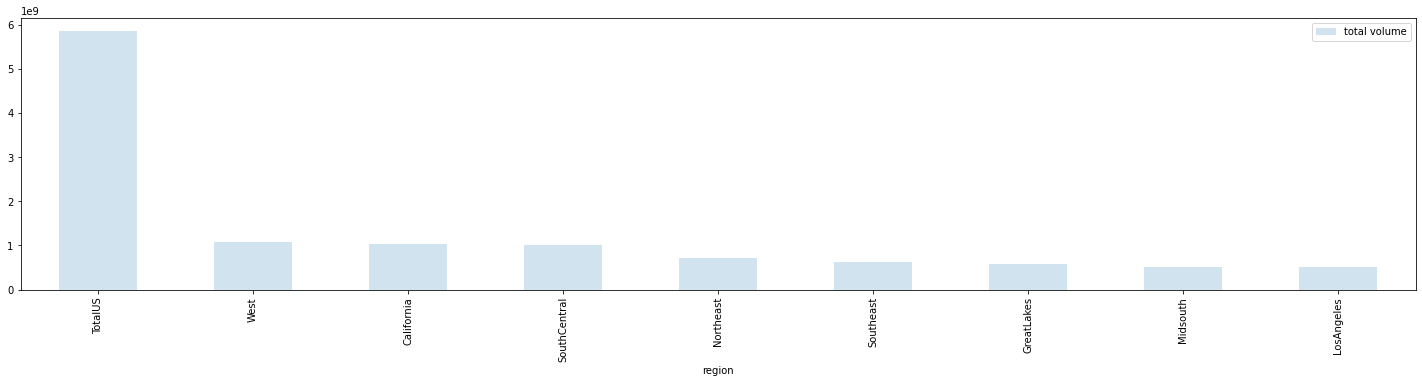

In [34]:
#plotting the top 9 regions in total volume used
top_reg.plot(kind="bar", x="region", y="total volume",
             alpha=0.2, figsize= (25,5))